In [58]:
import numpy as np
import scipy.io
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [11]:
train_data = scipy.io.loadmat("train_data.mat")
test_data = scipy.io.loadmat("test_data.mat")
print(train_data.keys())
print(test_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])


In [12]:
X_train = train_data['x']
y_train = train_data['y'].flatten()
X_test = test_data['x']
y_test = test_data['y'].flatten()


In [18]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

print(X_train.shape, X_test.shape) 
def normalize(dataset):
    mean_vector = np.mean(dataset, axis=0)
    std_vector = np.std(dataset, axis=0)
    scaled_dataset = (dataset - mean_vector)/std_vector 
    return scaled_dataset,mean_vector,std_vector

X_train_norm, mean, std = normalize(X_train)
X_test_norm = (X_test - mean) / std
print(X_test_norm,mean,std)

(12000, 784) (2000, 784)
[[-0.01032851 -0.0338112  -0.05969301 ... -0.04261721 -0.02805692
  -0.01729778]
 [-0.01032851 -0.0338112  -0.05969301 ... -0.04261721 -0.02805692
  -0.01729778]
 [-0.01032851 -0.0338112  -0.05969301 ... -0.04261721 -0.02805692
  -0.01729778]
 ...
 [-0.01032851 -0.0338112  -0.05969301 ... -0.04261721 -0.02805692
  -0.01729778]
 [-0.01032851 -0.0338112  -0.05969301 ... -0.04261721 -0.02805692
  -0.01729778]
 [-0.01032851 -0.0338112  -0.05969301 ... -0.04261721 -0.02805692
  -0.01729778]] [6.66666667e-04 9.75000000e-03 7.38333333e-02 1.70416667e-01
 2.27333333e-01 3.46833333e-01 7.92666667e-01 2.78008333e+00
 7.73425000e+00 1.65732500e+01 2.91936667e+01 3.82306667e+01
 3.25500000e+01 2.53065000e+01 2.44523333e+01 2.88430000e+01
 3.91677500e+01 3.73315833e+01 2.37889167e+01 1.19668333e+01
 4.83641667e+00 1.44200000e+00 4.58666667e-01 2.89000000e-01
 1.66500000e-01 6.72500000e-02 7.41666667e-03 1.10000000e-02
 3.66666667e-03 1.30000000e-02 1.50416667e-01 4.63916667

Above output shows that there are 12000 columns in train, meaning 6000 tshirt and 6000 sneakers.
There are 1000 testing data for both tshirts and sneakers.
The 28x28 get converted into a 1D vector of 784 columns.

Task 2: PCA

In [20]:
cov_matrix = np.cov(X_train_norm)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(eigenvalues.shape, eigenvectors.shape)
# Sort eigenvalues and eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(eigenvalues.shape[0])]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

explained_variance_threshold = 0.98

total_variance = sum(eigenvalues)
explained_variances = [(i/total_variance) for i in sorted(eigenvalues, reverse=True)]
cumulative_variances = np.cumsum(explained_variances)

num_principal_components = 0

for i, exp_var in enumerate(cumulative_variances):
    if exp_var > explained_variance_threshold:
        num_principal_components = i + 1
        break

print("Number of Key principal components explaining {}% of data: {}".format(explained_variance_threshold*100, num_principal_components))

(12000,) (12000, 12000)
Number of Key principal components explaining 98.0% of data: 382


Text(0.5, 0, '# of PCs')

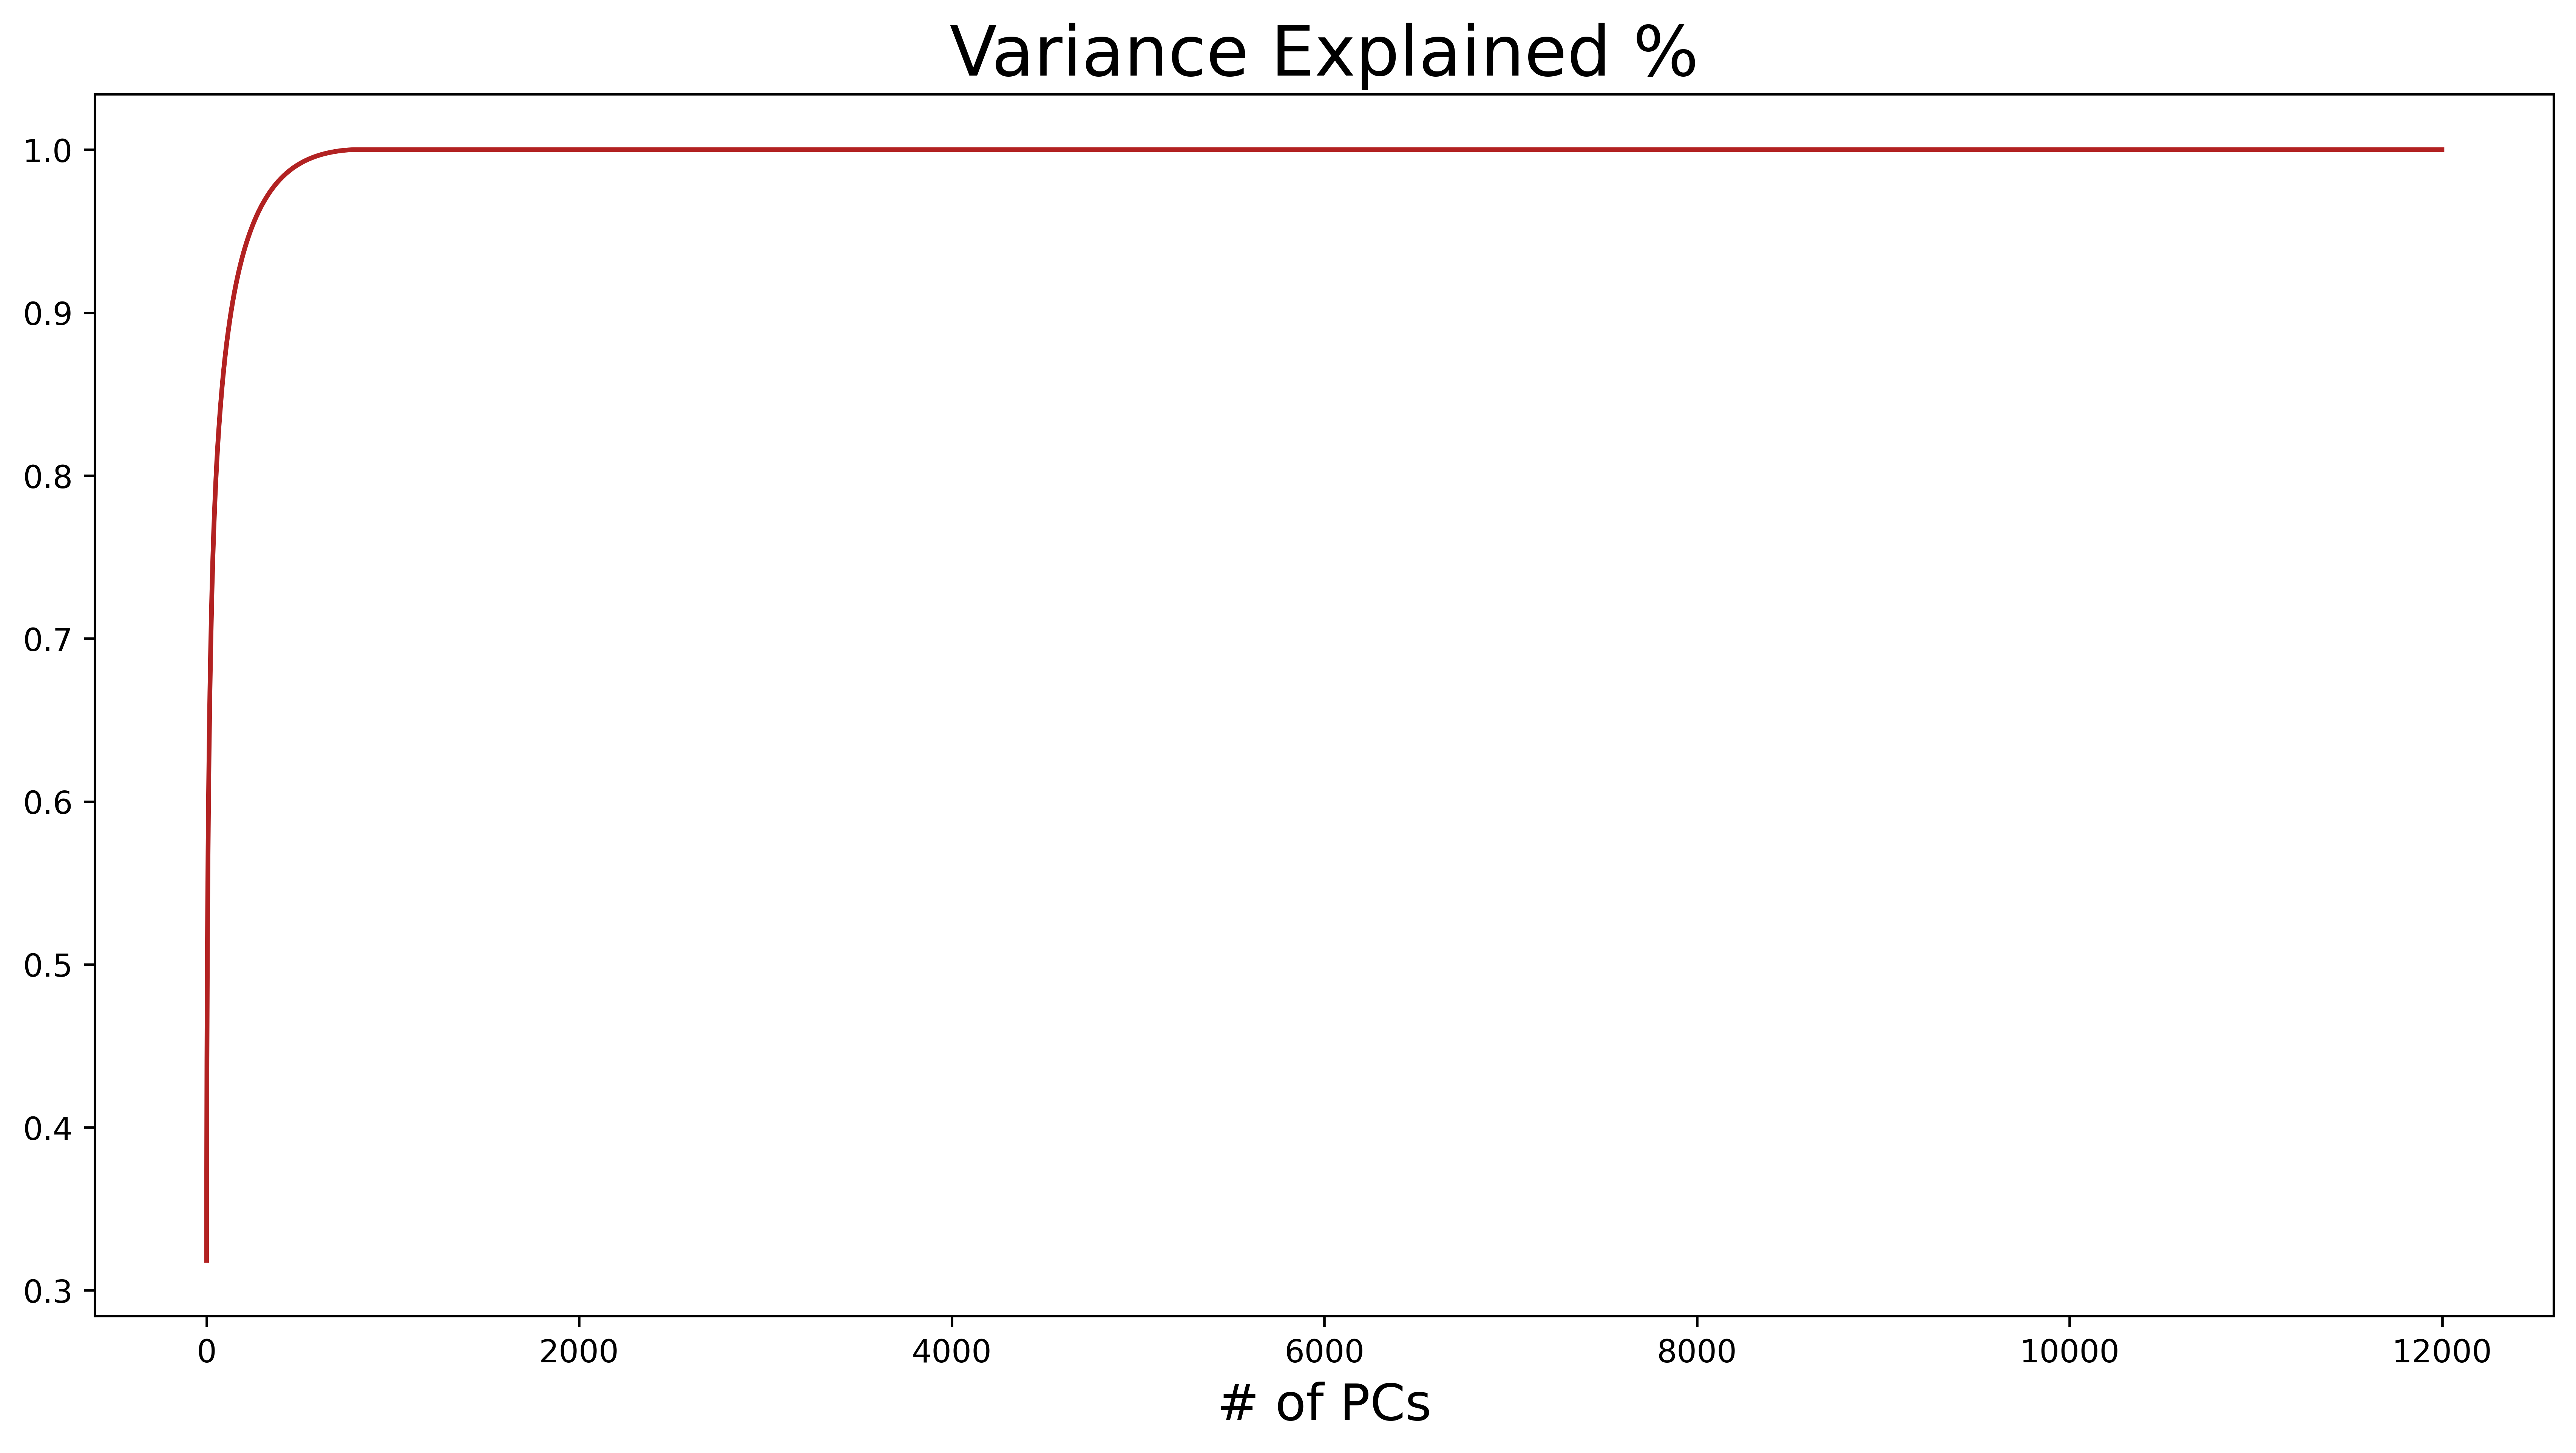

In [24]:
fig, axes = plt.subplots(1,1,figsize=(14,7), dpi=600
)
plt.plot(cumulative_variances, color='firebrick')
plt.title('Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)

Task 3:Dimensionality reduction using PCA

In [31]:
cov_matrix = np.cov(X_train_norm.T)

eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Form the projection matrix using the top two eigenvectors
projection_matrix = np.hstack((eigen_pairs[0][1].reshape(784, 1), eigen_pairs[1][1].reshape(784, 1)))

projected_data = X_train_norm.dot(projection_matrix)
print("Projected training data shape:", projected_data.shape)
projected_test_data = X_test_norm.dot(projection_matrix)
print("Projected test data shape:", projected_test_data.shape)


Projected training data shape: (12000, 2)
Projected test data shape: (2000, 2)


In [32]:
train_df = pd.DataFrame(projected_data, columns=[0, 1])
train_df['Y'] = y_train
test_df = pd.DataFrame(projected_test_data, columns=[0, 1])
test_df['Y'] = y_test

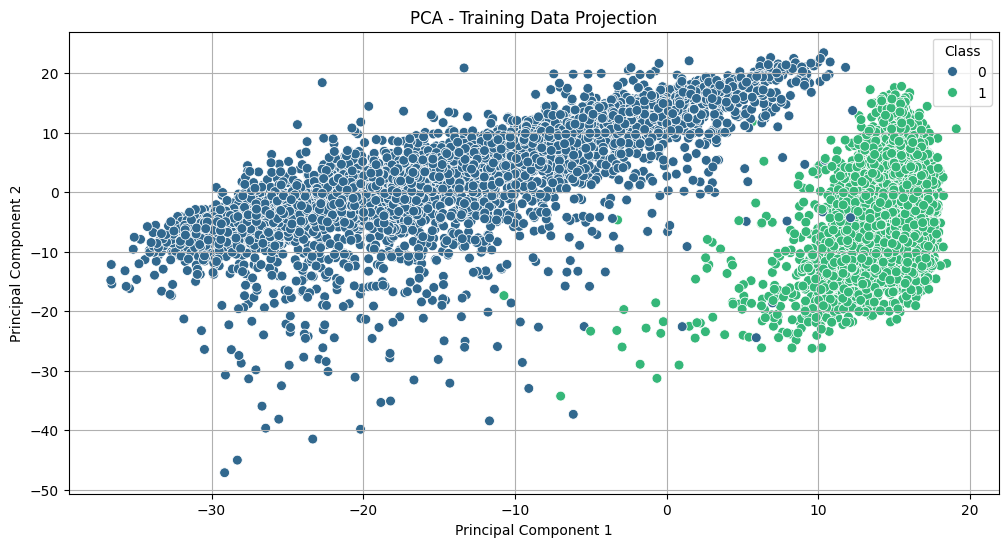

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df[0], y=train_df[1], hue=train_df['Y'], palette='viridis', s=50)
plt.title('PCA - Training Data Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid()
plt.show()


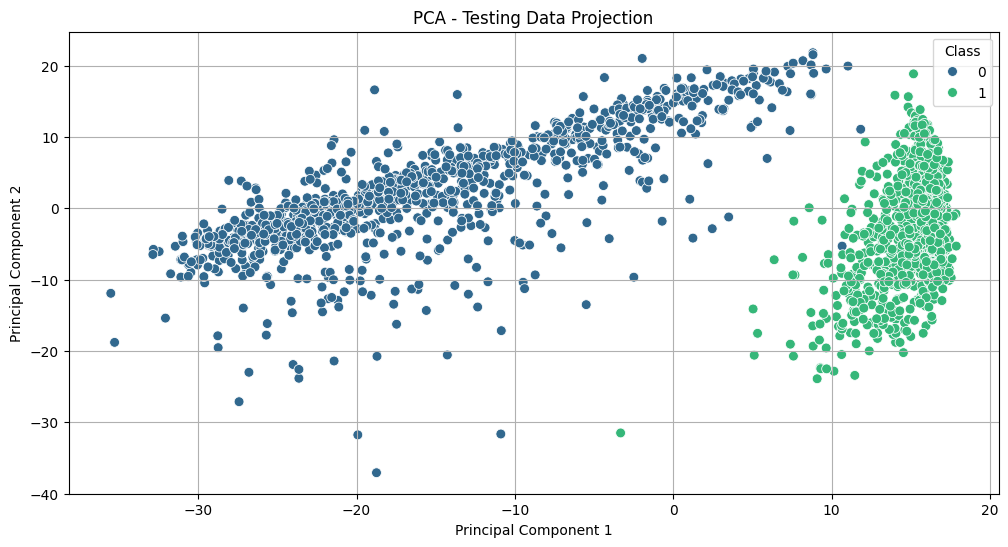

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=test_df[0], y=test_df[1], hue=test_df['Y'], palette='viridis', s=50)
plt.title('PCA - Testing Data Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid()
plt.show()


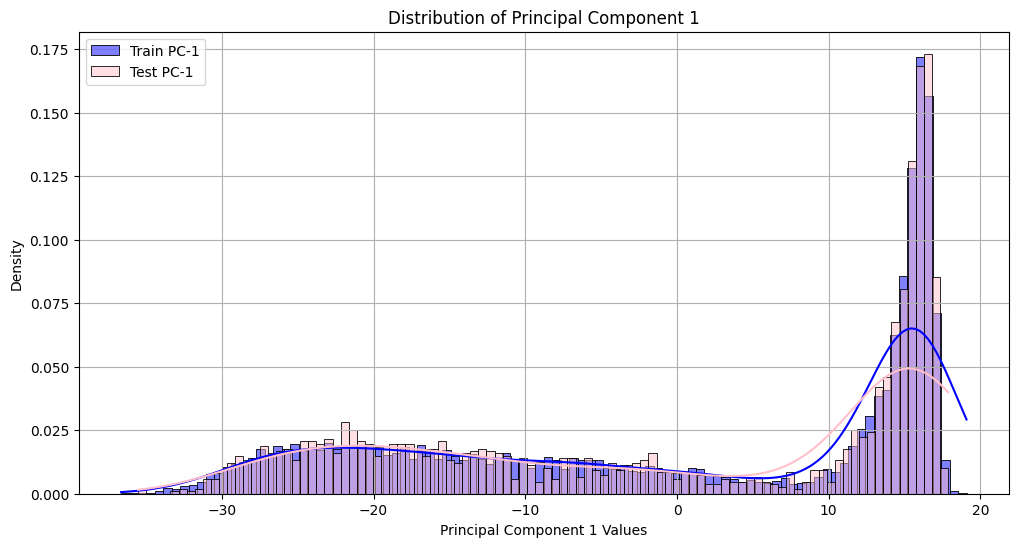

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df[0], kde=True, color='blue', label='Train PC-1', stat='density', bins=100, alpha=0.5)
sns.histplot(test_df[0], kde=True, color='pink', label='Test PC-1', stat='density', bins=100, alpha=0.5)
plt.title('Distribution of Principal Component 1')
plt.xlabel('Principal Component 1 Values')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

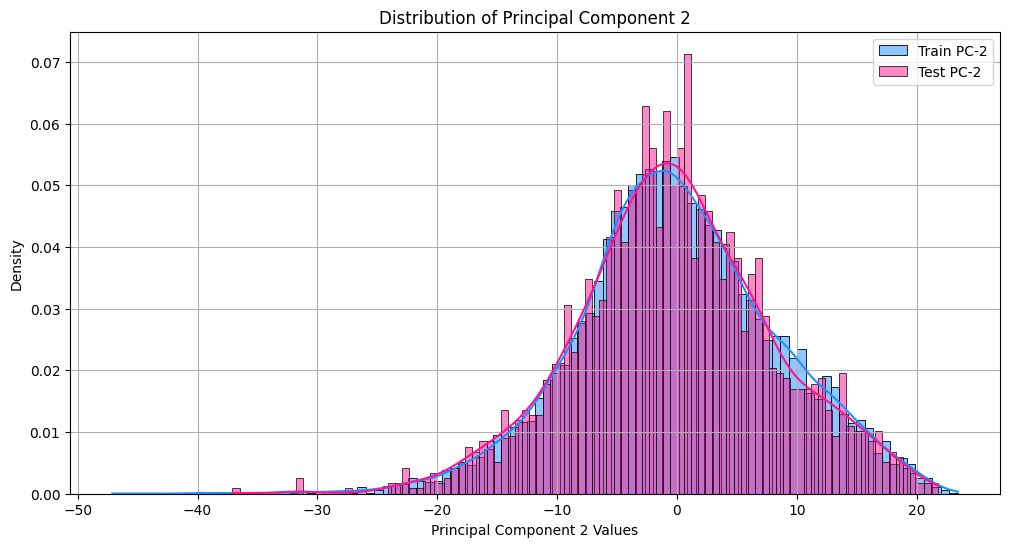

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df[1], kde=True, color='dodgerblue', label='Train PC-2', stat='density', bins=100, alpha=0.5)
sns.histplot(test_df[1], kde=True, color='deeppink', label='Test PC-2', stat='density', bins=100, alpha=0.5)
plt.title('Distribution of Principal Component 2')
plt.xlabel('Principal Component 2 Values')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

Y
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: 0, dtype: object

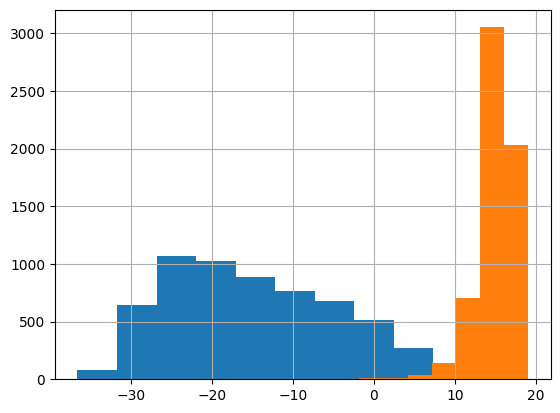

In [67]:
train_df.groupby('Y')[0].hist()


Y
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: 0, dtype: object

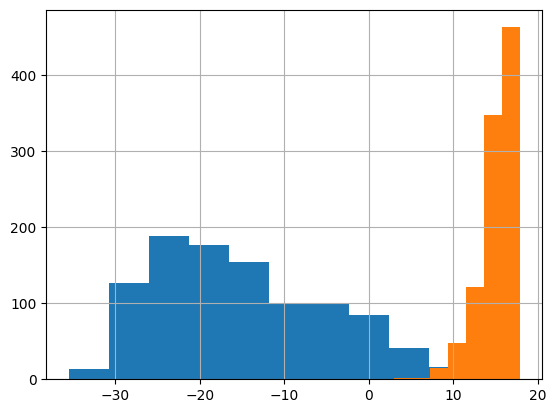

In [68]:
test_df.groupby('Y')[0].hist()

They look like normal distribution as we can see how the bell shape is there over the data. The height and thickness varies but overall they look like normal distribution.

Task 4: Density Estimation

In [77]:
def calculate_gaussian_params(train_df):
    class_labels = train_df['Y'].unique()  
    mean_dict = {}
    cov_dict = {}
    for label in class_labels:
        class_data = train_df[train_df['Y'] == label][[0, 1]].to_numpy()
        mean = np.mean(class_data, axis=0)
        covariance = np.cov(class_data, rowvar=False)
        mean_dict[label] = mean
        cov_dict[label] = covariance
    for label in class_labels:
        print(f"Class {label} - Mean: {mean_dict[label]}, Covariance: \n{cov_dict[label]}\n")
    return mean_dict, cov_dict

mean_params, cov_params = calculate_gaussian_params(train_df)


Class 0 - Mean: [-14.96013579   2.53759713], Covariance: 
[[103.38209995  69.15661464]
 [ 69.15661464  73.43418283]]

Class 1 - Mean: [14.96013579 -2.53759713], Covariance: 
[[ 4.94656978  6.78163691]
 [ 6.78163691 54.67473161]]



Task 5:Bayesian Decision Theory for optimal classification

In [76]:
def classify_samples_min_error_rate(train_df, test_df, mean_dict, cov_dict):

    class_labels = list(mean_dict.keys())
        # Since priors are equal, the predicted class is based directly on probabilities
    train_predictions = []
    for index, row in train_df.iterrows():
        probabilities = [multivariate_normal.pdf(row[[0, 1]], mean=mean_dict[label], cov=cov_dict[label]) for label in class_labels]
        predicted_class = class_labels[np.argmax(probabilities)]
        train_predictions.append(predicted_class)

    train_accuracy = np.mean(np.array(train_predictions) == train_df['Y']) * 100

    test_predictions = []
    for index, row in test_df.iterrows():
        probabilities = [multivariate_normal.pdf(row[[0, 1]], mean=mean_dict[label], cov=cov_dict[label]) for label in class_labels]
        predicted_class = class_labels[np.argmax(probabilities)]
        test_predictions.append(predicted_class)

    test_accuracy = np.mean(np.array(test_predictions) == test_df['Y']) * 100

    return train_accuracy, test_accuracy

train_accuracy, test_accuracy = classify_samples_min_error_rate(train_df, test_df, mean_params, cov_params)

print(f"Training Set Accuracy: {train_accuracy:.2f}%")
print(f"Testing Set Accuracy: {test_accuracy:.2f}%")


Training Set Accuracy: 99.75%
Testing Set Accuracy: 99.90%
